In [39]:
import pandas as pd
import numpy as np
import missingno as mnp
pd.set_option('display.max_columns',None)
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
%matplotlib inline
import statsmodels.api as sm
from statsmodels.formula.api import ols

## Download the Dataset into Python Environment

In [40]:
df = pd.read_csv('311_Service_Requests_from_2010_to_Present.csv')
df.head()

/Users/priyanshkhandelwal/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (48,49) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,VERMILYEA AVENUE,ACADEMY STREET,WEST 204 STREET,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,01/01/2016 07:59:45 AM,The Police Department responded and upon arriv...,01/01/2016 12:55:15 AM,12 MANHATTAN,MANHATTAN,1005409.0,254678.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,23 AVENUE,27 STREET,28 STREET,NaN,NaN,ADDRESS,ASTORIA,NaN,Precinct,Closed,01/01/2016 07:59:44 AM,The Police Department responded to the complai...,01/01/2016 01:26:57 AM,01 QUEENS,QUEENS,1007766.0,221986.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,VALENTINE AVENUE,EAST 198 STREET,EAST 199 STREET,NaN,NaN,ADDRESS,BRONX,NaN,Precinct,Closed,01/01/2016 07:59:29 AM,The Police Department responded and upon arriv...,01/01/2016 04:51:03 AM,07 BRONX,BRONX,1015081.0,256380.0,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,BAISLEY AVENUE,EDISON AVENUE,B STREET,NaN,NaN,ADDRESS,BRONX,NaN,Precinct,Closed,01/01/2016 07:57:46 AM,The Police Department responded to the complai...,01/01/2016 07:43:13 AM,10 BRONX,BRONX,1031740.0,243899.0,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,57 ROAD,SEABURY STREET,HOFFMAN DRIVE,NaN,NaN,ADDRESS,ELMHURST,NaN,Precinct,Closed,01/01/2016 07:56:58 AM,The Police Department responded and upon arriv...,01/01/2016 03:24:42 AM,04 QUEENS,QUEENS,1019123.0,206375.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


## Understanding the shape of the dataset

In [41]:
df.shape

(364558, 53)

### Checking the Unique variables

In [42]:
for col in df:
    print(f'No of unique values in {col} : {df[col].nunique()}')

No of unique values in Unique Key : 364558
No of unique values in Created Date : 362018
No of unique values in Closed Date : 339837
No of unique values in Agency : 1
No of unique values in Agency Name : 3
No of unique values in Complaint Type : 24
No of unique values in Descriptor : 45
No of unique values in Location Type : 18
No of unique values in Incident Zip : 201
No of unique values in Incident Address : 126372
No of unique values in Street Name : 7693
No of unique values in Cross Street 1 : 6234
No of unique values in Cross Street 2 : 6064
No of unique values in Intersection Street 1 : 4704
No of unique values in Intersection Street 2 : 4422
No of unique values in Address Type : 5
No of unique values in City : 53
No of unique values in Landmark : 120
No of unique values in Facility Type : 1
No of unique values in Status : 4
No of unique values in Due Date : 362015
No of unique values in Resolution Description : 18
No of unique values in Resolution Action Updated Date : 340833
No 

### A lot of rows are filled with 'Unspecified'. So we will replace that with null values

In [43]:
df.replace('Unspecified',np.nan,regex = True,inplace = True)

### Plotting the bar for null values

<AxesSubplot:>

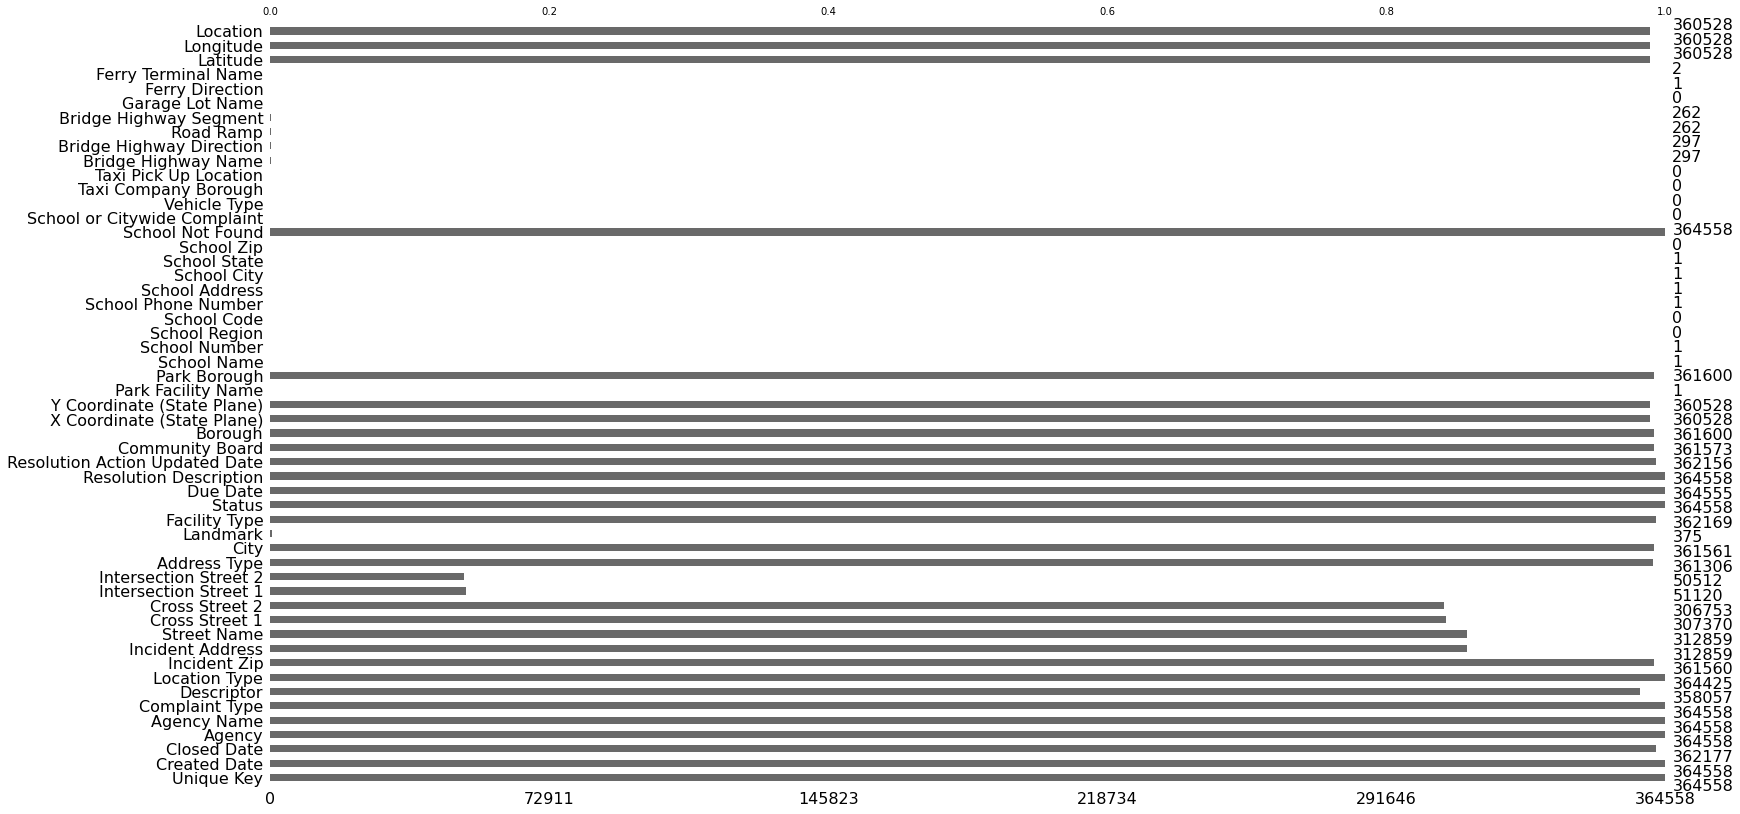

In [44]:
mnp.bar(df)

### Now we will check the variables and the percentage of null values they have

In [45]:
df.isna().mean()*100

Unique Key                          0.000000
Created Date                        0.000000
Closed Date                         0.653120
Agency                              0.000000
Agency Name                         0.000000
Complaint Type                      0.000000
Descriptor                          1.783255
Location Type                       0.036483
Incident Zip                        0.822366
Incident Address                   14.181283
Street Name                        14.181283
Cross Street 1                     15.686941
Cross Street 2                     15.856187
Intersection Street 1              85.977540
Intersection Street 2              86.144317
Address Type                        0.892039
City                                0.822091
Landmark                           99.897136
Facility Type                       0.655314
Status                              0.000000
Due Date                            0.000823
Resolution Description              0.000000
Resolution

### now we will save the name of those variables who have null values more than 75%

In [46]:
delcol = []
for col in df:
    if df[col].isna().mean()*100 > 75:
        delcol.append(col)
print(delcol)

['Intersection Street 1', 'Intersection Street 2', 'Landmark', 'Park Facility Name', 'School Name', 'School Number', 'School Region', 'School Code', 'School Phone Number', 'School Address', 'School City', 'School State', 'School Zip', 'School or Citywide Complaint', 'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location', 'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment', 'Garage Lot Name', 'Ferry Direction', 'Ferry Terminal Name']


### Dropping the variables with >75% null values

In [47]:
df.drop(columns = delcol,inplace = True)

In [48]:
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Address Type,City,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Borough,School Not Found,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,VERMILYEA AVENUE,ACADEMY STREET,WEST 204 STREET,ADDRESS,NEW YORK,Precinct,Closed,01/01/2016 07:59:45 AM,The Police Department responded and upon arriv...,01/01/2016 12:55:15 AM,12 MANHATTAN,MANHATTAN,1005409.0,254678.0,MANHATTAN,N,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,23 AVENUE,27 STREET,28 STREET,ADDRESS,ASTORIA,Precinct,Closed,01/01/2016 07:59:44 AM,The Police Department responded to the complai...,01/01/2016 01:26:57 AM,01 QUEENS,QUEENS,1007766.0,221986.0,QUEENS,N,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,VALENTINE AVENUE,EAST 198 STREET,EAST 199 STREET,ADDRESS,BRONX,Precinct,Closed,01/01/2016 07:59:29 AM,The Police Department responded and upon arriv...,01/01/2016 04:51:03 AM,07 BRONX,BRONX,1015081.0,256380.0,BRONX,N,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,BAISLEY AVENUE,EDISON AVENUE,B STREET,ADDRESS,BRONX,Precinct,Closed,01/01/2016 07:57:46 AM,The Police Department responded to the complai...,01/01/2016 07:43:13 AM,10 BRONX,BRONX,1031740.0,243899.0,BRONX,N,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,57 ROAD,SEABURY STREET,HOFFMAN DRIVE,ADDRESS,ELMHURST,Precinct,Closed,01/01/2016 07:56:58 AM,The Police Department responded and upon arriv...,01/01/2016 03:24:42 AM,04 QUEENS,QUEENS,1019123.0,206375.0,QUEENS,N,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [49]:
df.shape

(364558, 29)

### Now we will check wether there are null values in the Date column or not

In [50]:
df[['Created Date','Closed Date']].isna().mean()*100

Created Date    0.00000
Closed Date     0.65312
dtype: float64

### Dropping the Rows with null values

In [52]:
df.dropna(subset = ['Closed Date'],inplace =True)

In [53]:
df[['Created Date','Closed Date']].isna().mean()*100

Created Date    0.0
Closed Date     0.0
dtype: float64

## Plotting a frequency plot for city-wise complaints

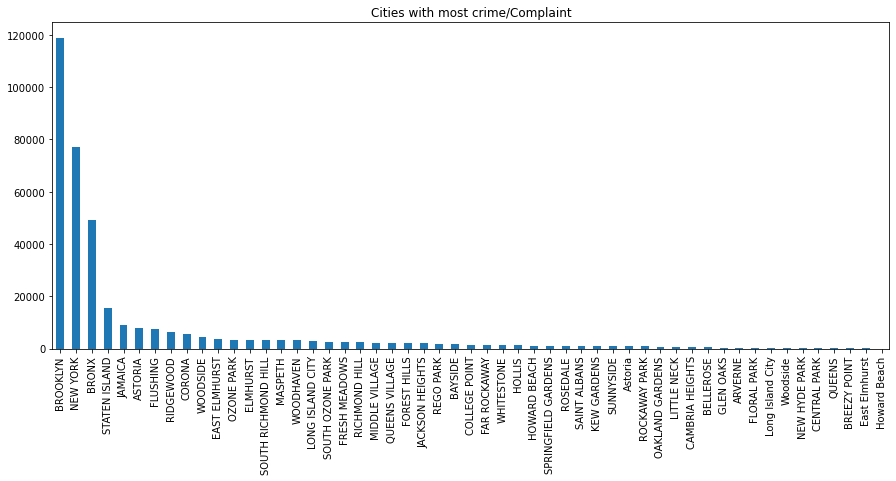

In [54]:
plt.figure(figsize = (15,6))
df['City'].value_counts().plot(kind = 'bar')
plt.title('Cities with most crime/Complaint')
plt.show()

## Plotting scatter and hexbin plots for complaint concentration across Brooklyn

### First we will save the data only from BROOKLYN in a new dataframe

In [55]:
brook = df[df['City']=='BROOKLYN']

### We can see the diff types of complaints in BROOKLYN

In [56]:
brook.groupby('Complaint Type')['Agency'].count()

Complaint Type
Animal Abuse                  3191
Bike/Roller/Skate Chronic      124
Blocked Driveway             36445
Derelict Vehicle              6257
Disorderly Youth                79
Drinking                       291
Graffiti                        60
Homeless Encampment            948
Illegal Fireworks               61
Illegal Parking              33532
Noise - Commercial           13855
Noise - House of Worship       389
Noise - Park                  1575
Noise - Street/Sidewalk      13982
Noise - Vehicle               5965
Panhandling                     49
Posting Advertisement           58
Traffic                       1258
Urinating in Public            155
Vending                        575
Name: Agency, dtype: int64

### Plotting Hexbin Plot Using the Latitudes and Longitudes

(-74.05061403048781, -73.8464793432815, 40.561126853754885, 40.78979838623255)

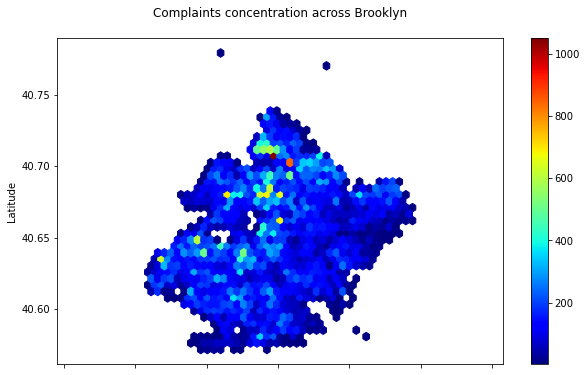

In [19]:
brook.plot(kind='hexbin', x='Longitude', y='Latitude', gridsize=40,
    colormap = 'jet',mincnt=1,title = 'Complaints concentration across Brooklyn\n', figsize=(10,6)).axis('equal')

### Plotting the Scatter Plot

(-74.05061403028367, -73.84647934348564, 40.561126853754885, 40.78979838623255)

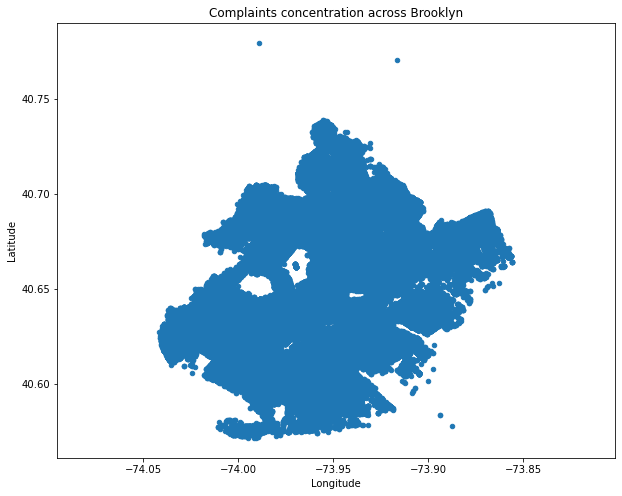

In [36]:
brook[['Longitude', 'Latitude']].plot(kind='scatter',
x='Longitude', y='Latitude', figsize=(10,8),title = 'Complaints concentration across Brooklyn').axis('equal')

## Plotting a bar graph of count vs. complaint types

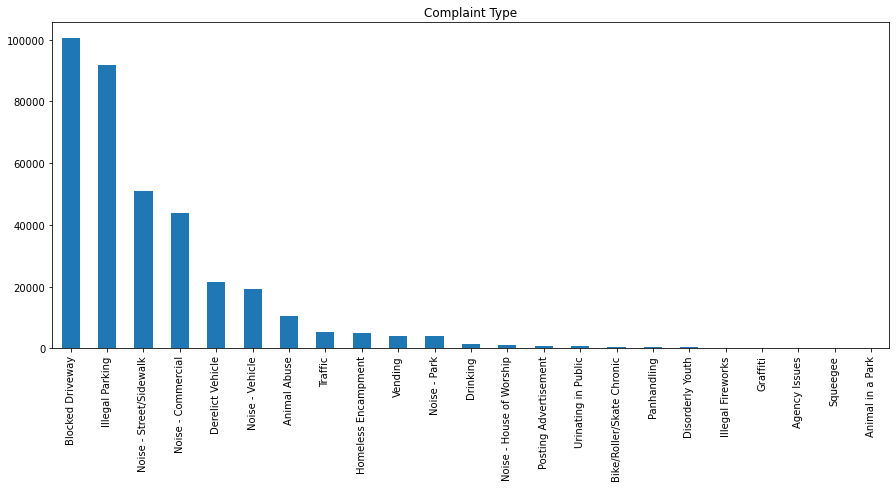

In [57]:
plt.figure(figsize = (15,6))
df['Complaint Type'].value_counts().plot(kind = 'bar')
plt.title('Complaint Type')
plt.show()

## Plotting the top 10 types of complaints

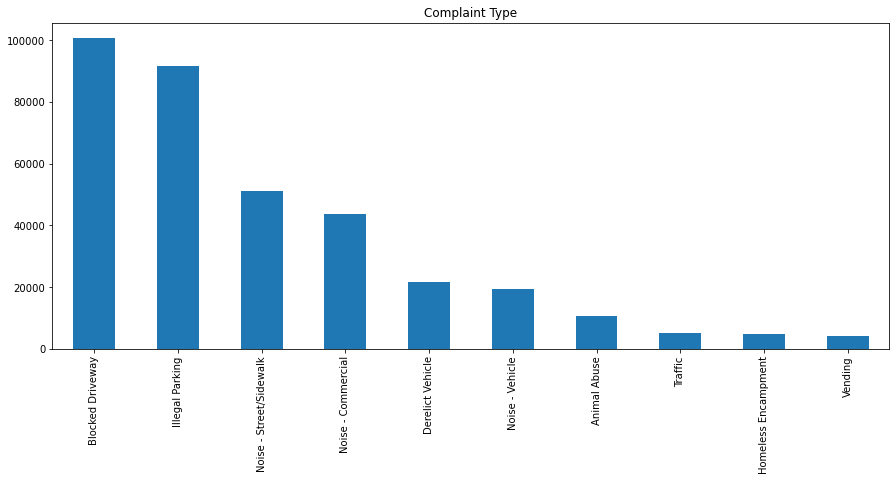

In [58]:
plt.figure(figsize = (15,6))
df['Complaint Type'].value_counts()[:10].plot(kind = 'bar')
plt.title('Complaint Type')
plt.show()

## Displaying the types of complaints in each city in a separate dataset

In [59]:
majcomp = df.groupby(['City','Complaint Type'])['Complaint Type'].count().to_frame()

In [60]:
majcomp.head()

Complaint Type
City    Complaint Type                  
ARVERNE Animal Abuse                  46
        Blocked Driveway              50
        Derelict Vehicle              32
        Disorderly Youth               2
        Drinking                       1

## Visualizing the major types of complaints in each city

### First we will save it in a new DF

In [25]:
viscomp = majcomp.rename(columns = {majcomp.columns[0]: 'Count'}).reset_index()
viscomp.head()

,City,Complaint Type,Count
0,ARVERNE,Animal Abuse,46
1,ARVERNE,Blocked Driveway,50
2,ARVERNE,Derelict Vehicle,32
3,ARVERNE,Disorderly Youth,2
4,ARVERNE,Drinking,1


### Now we will sort them in descending order

In [26]:
viscomp = viscomp.sort_values(by = ['Count'],ascending = False)
viscomp.head()

,City,Complaint Type,Count
105,BROOKLYN,Blocked Driveway,36445
112,BROOKLYN,Illegal Parking,33532
468,NEW YORK,Noise - Street/Sidewalk,22245
465,NEW YORK,Noise - Commercial,18686
85,BRONX,Blocked Driveway,17062


### Now we will drop the duplicates in the 'CITY' column, and only keep the first/highest value

In [27]:
viscomp.drop_duplicates(subset = 'City',keep = 'first',inplace = True)
viscomp

,City,Complaint Type,Count
105,BROOKLYN,Blocked Driveway,36445
468,NEW YORK,Noise - Street/Sidewalk,22245
85,BRONX,Blocked Driveway,17062
695,STATEN ISLAND,Illegal Parking,6224
235,FLUSHING,Blocked Driveway,3640
351,JAMAICA,Blocked Driveway,3620
152,CORONA,Blocked Driveway,3597
19,ASTORIA,Blocked Driveway,3436
579,RIDGEWOOD,Illegal Parking,2235
756,WOODSIDE,Blocked Driveway,2038


### Plotting the cities and their most common complaint with the count as well

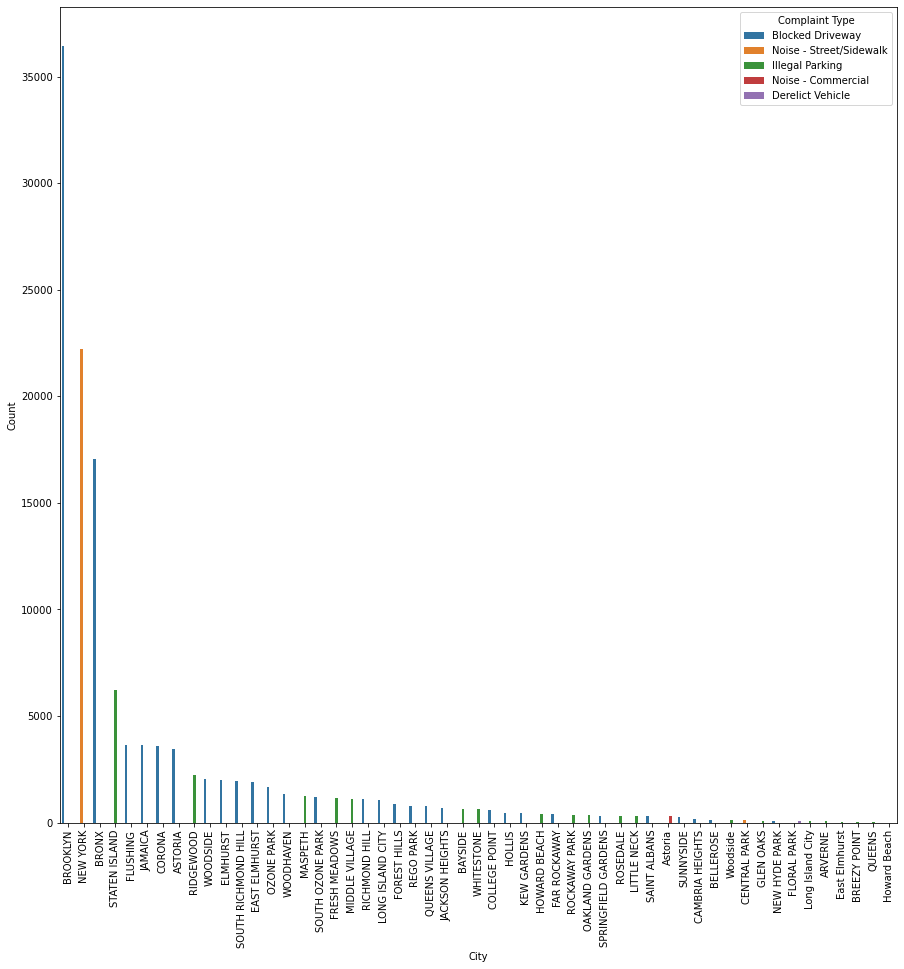

In [28]:
plt.figure(figsize = (15,15))
sns.barplot(x = 'City',y = 'Count',hue = 'Complaint Type',data = viscomp)
plt.xticks(rotation = 90)
plt.show()

## Checking if the average response time across various types of complaints

In [29]:
df['Create'] = pd.to_datetime(df['Created Date'])
df['Closed'] = pd.to_datetime(df['Closed Date'])
df['Req Closing time'] = df['Closed'] - df['Create']
df['Req Closing time min'] = df['Req Closing time'].dt.seconds/60
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Address Type,City,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Borough,School Not Found,Latitude,Longitude,Location,Create,Closed,Req Closing time,Req Closing time min
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,VERMILYEA AVENUE,ACADEMY STREET,WEST 204 STREET,ADDRESS,NEW YORK,Precinct,Closed,01/01/2016 07:59:45 AM,The Police Department responded and upon arriv...,01/01/2016 12:55:15 AM,12 MANHATTAN,MANHATTAN,1005409.0,254678.0,MANHATTAN,N,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",2015-12-31 23:59:45,2016-01-01 00:55:15,0 days 00:55:30,55.500000
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,23 AVENUE,27 STREET,28 STREET,ADDRESS,ASTORIA,Precinct,Closed,01/01/2016 07:59:44 AM,The Police Department responded to the complai...,01/01/2016 01:26:57 AM,01 QUEENS,QUEENS,1007766.0,221986.0,QUEENS,N,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",2015-12-31 23:59:44,2016-01-01 01:26:57,0 days 01:27:13,87.216667
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,VALENTINE AVENUE,EAST 198 STREET,EAST 199 STREET,ADDRESS,BRONX,Precinct,Closed,01/01/2016 07:59:29 AM,The Police Department responded and upon arriv...,01/01/2016 04:51:03 AM,07 BRONX,BRONX,1015081.0,256380.0,BRONX,N,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",2015-12-31 23:59:29,2016-01-01 04:51:03,0 days 04:51:34,291.566667
3,32305098,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,BAISLEY AVENUE,EDISON AVENUE,B STREET,ADDRESS,BRONX,Precinct,Closed,01/01/2016 07:57:46 AM,The Police Department responded to the complai...,01/01/2016 07:43:13 AM,10 BRONX,BRONX,1031740.0,243899.0,BRONX,N,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",2015-12-31 23:57:46,2016-01-01 07:43:13,0 days 07:45:27,465.450000
4,32306529,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,57 ROAD,SEABURY STREET,HOFFMAN DRIVE,ADDRESS,ELMHURST,Precinct,Closed,01/01/2016 07:56:58 AM,The Police Department responded and upon arriv...,01/01/2016 03:24:42 AM,04 QUEENS,QUEENS,1019123.0,206375.0,QUEENS,N,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",2015-12-31 23:56:58,2016-01-01 03:24:42,0 days 03:27:44,207.733333


(0.0, 2000.0)

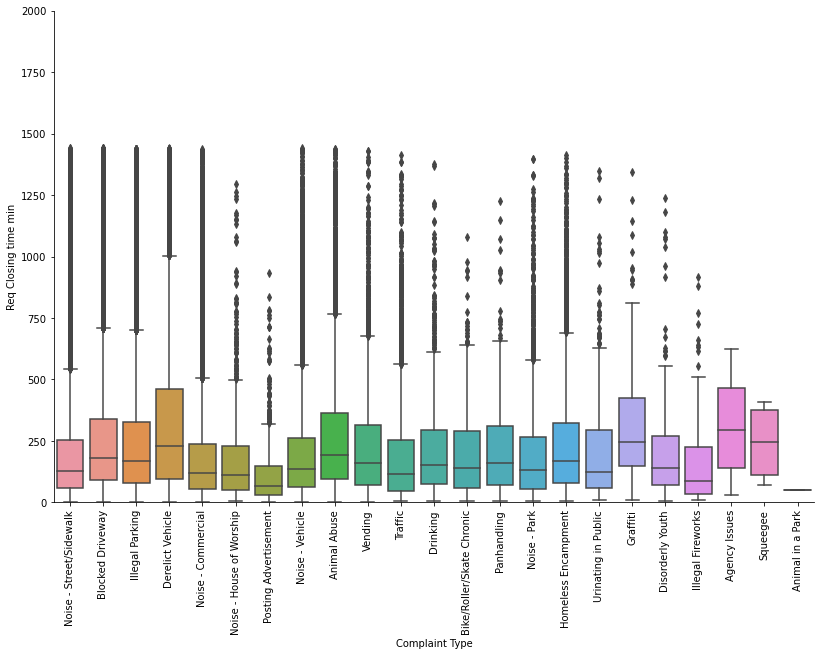

In [30]:
g=sns.catplot(x="Complaint Type",y="Req Closing time min",kind="box",data=df)
g.fig.set_figheight(8)
g.fig.set_figwidth(15)
plt.xticks(rotation=90)
plt.ylim((0,2000))

In [31]:
avgresptime = df[['Complaint Type','Req Closing time min']].groupby(['Complaint Type']).mean()
avgresptime

,Req Closing time min
Complaint Type,
Agency Issues,304.818750
Animal Abuse,271.004139
Animal in a Park,50.566667
Bike/Roller/Skate Chronic,206.601825
Blocked Driveway,253.569534
Derelict Vehicle,328.837156
Disorderly Youth,201.491058
Drinking,215.996035
Graffiti,323.735244


In [32]:
avgresptime['Req Closing time in Sec'] = avgresptime[['Req Closing time min']]*60
avgresptime

,Req Closing time min,Req Closing time in Sec
Complaint Type,,
Agency Issues,304.818750,18289.125000
Animal Abuse,271.004139,16260.248338
Animal in a Park,50.566667,3034.000000
Bike/Roller/Skate Chronic,206.601825,12396.109474
Blocked Driveway,253.569534,15214.172017
Derelict Vehicle,328.837156,19730.229343
Disorderly Youth,201.491058,12089.463492
Drinking,215.996035,12959.762108
Graffiti,323.735244,19424.114650


In [33]:
avgresptime.dropna(inplace = True)
avgresptime

,Req Closing time min,Req Closing time in Sec
Complaint Type,,
Agency Issues,304.818750,18289.125000
Animal Abuse,271.004139,16260.248338
Animal in a Park,50.566667,3034.000000
Bike/Roller/Skate Chronic,206.601825,12396.109474
Blocked Driveway,253.569534,15214.172017
Derelict Vehicle,328.837156,19730.229343
Disorderly Youth,201.491058,12089.463492
Drinking,215.996035,12959.762108
Graffiti,323.735244,19424.114650


In [34]:
pval = pd.DataFrame()
pval['Complaint'] = df['Complaint Type']
pval['Req_Closing_Time'] = df['Req Closing time min']
pval.head()

,Complaint,Req_Closing_Time
0,Noise - Street/Sidewalk,55.500000
1,Blocked Driveway,87.216667
2,Blocked Driveway,291.566667
3,Illegal Parking,465.450000
4,Illegal Parking,207.733333


In [35]:
lm=ols("Req_Closing_Time~Complaint",data=pval).fit()
table=sm.stats.anova_lm(lm)
table

,df,sum_sq,mean_sq,F,PR(>F)
Complaint,22.0,5.497570e+08,2.498896e+07,498.796786,0.0
Residual,362154.0,1.814336e+10,5.009847e+04,NaN,NaN


### Since the pvalue is less than 5%, we can accept the Null Hypothesis